# Zadanie do wykonania

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dane

In [2]:
import os

DATASETS_ROOT = "./data"
STUDENTS_MATH_GRADES_DATASET_PATH = os.path.join(DATASETS_ROOT, "student-mat.csv")
STUDENTS_MATH_GRADES_DATASET = pd.read_csv(
    STUDENTS_MATH_GRADES_DATASET_PATH, 
    sep=";"
)

In [3]:
STUDENTS_MATH_GRADES_DATASET

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


## Treść zadań

### Funkcje pomocnicze

In [4]:
from typing import Callable

In [5]:
def test_single_axes_plot(
    plot_fun: Callable[[plt.Figure, plt.Axes, pd.DataFrame], None],
    data: pd.DataFrame
) -> None:
    figure, ax = plt.subplots(1, 1, figsize=(6, 6))
    plot_fun(figure, ax, data)
    plt.show()

__Zadanie 1.__

Narysuj wykres słupkowy ze średnimi i odchyleniami standardowymi wartości kolumn __Medu, Fedu, traveltime, studytime, health__. 

Zadbaj o czytelność (dodaj podpisy osi i samego wykresu). 

__Oczekiwane rozwiązanie:__

![solution](./data/ex_1_result.png)

In [13]:
def plot_numeric_column_means(
    figure: plt.Figure,
    ax: plt.Axes,
    data: pd.DataFrame
) -> None:
    columns = ["Medu", "Fedu", "traveltime", "studytime", "health"]
    plot_data_mean = data[columns].mean()
    plot_data_std = data[columns].std()
    x=np.arange(len(columns))
    ax.bar(x, height=plot_data_mean.values, yerr=plot_data_std.values, color='g', width=0.6)
    
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.set_title("Columns mean and std values")
    ax.set_ylabel("Feature column mean")
    ax.set_xlabel("Features")


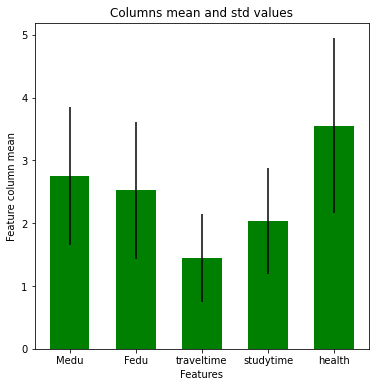

In [14]:
test_single_axes_plot(
    plot_fun=plot_numeric_column_means,
    data=STUDENTS_MATH_GRADES_DATASET
)

__Zadanie 2.__

Narysuj wykres słupkowy obrazujący wartości średnie kolumn __famrel, freetime, goout, absences__ w zależności od wartości kolumny __famsize__. Zadbaj o czytelność (dodaj podpisy osi i samego wykresu).

__Oczekiwane rozwiązanie:__

![solution](./data/ex_2_result.png)

In [57]:
def plot_famsize_based_bars(
    figure: plt.Figure,
    ax: plt.Axes,
    data: pd.DataFrame
) -> None:
    columns = ["famsize", "famrel", "freetime", "goout", "absences"]
    plot_data = data[columns].groupby("famsize").agg(np.mean)
    means_gt3 = plot_data.loc["GT3", :]
    means_le3 = plot_data.loc["LE3", :]
    x=np.arange(len(columns) - 1)
    width = 0.3
    ax.bar(x-width/2, height=means_gt3, width = width, color='r', label='GT3')
    ax.bar(x+width/2, height=means_le3, width = width, color='g', label="LE3")
    ax.set_xticks(x)
    ax.set_xticklabels(columns[1:])
    ax.set_title("Columns mean values w.r.t famsize")
    ax.set_ylabel("Feature column mean")
    ax.set_xlabel("Features")
    ax.legend(loc="upper left")

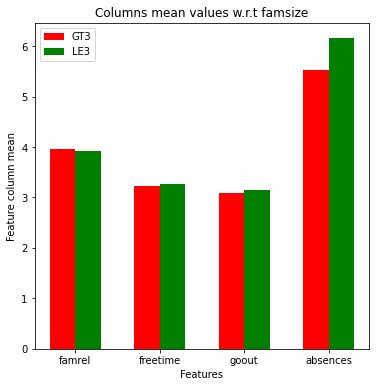

In [58]:
test_single_axes_plot(
    plot_fun=plot_famsize_based_bars,
    data=STUDENTS_MATH_GRADES_DATASET
)

__Zadanie 3.__

Narysuj histogram kolumny __Mjob__. Zadbaj o czytelność (dodaj podpisy osi i samego wykresu).

__Oczekiwane rozwiązanie:__

![solution](./data/ex_3_result.png)

In [149]:
def plot_mjob_histogram(
    figure: plt.Figure,
    ax: plt.Axes,
    data: pd.DataFrame
) -> None:
    plot_data = data.Mjob
    unique_values = plot_data.unique()
    width = 0.7
    ax.hist(plot_data, bins=np.arange(len(unique_values)+1), width=width,  color="g")
    #ax.set_xticklabels(unique_values)
    ax.set_xticks(np.arange(len(unique_values)) + width/2)
    ax.set_xlim(-0.1, len(unique_values) - 1 + width + 0.1)
    ax.set_title("Histogram of Mjob values")
    ax.set_ylabel("Examples count")
    ax.set_xlabel("Mjob type")
    
    

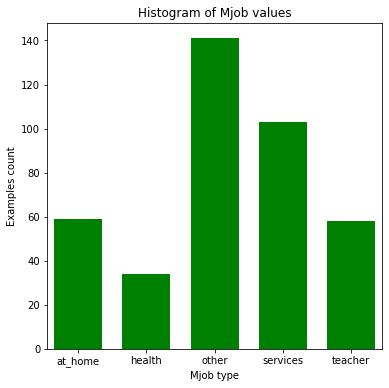

In [150]:
test_single_axes_plot(
    plot_fun=plot_mjob_histogram,
    data=STUDENTS_MATH_GRADES_DATASET
)

__Zadanie 4.__

Narysuj heatmap'e korelacji między danymi zapisanymi w kolumnach __health, G1, G2, G3__.

Zadbaj o podpisanie osi i samego wykresu oraz dodanie wskaźnika obrazującego wartości przypisane do poszczególnych kolorów (colorbar).

Z racji użycia korelacji Pearsona (https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) wyskaluj wartości heatmapy w zakresie [-1, 1]. Użyj mapy kolorów "RdYlGn".


__Zadanie dodatkowe__

Uzupełnij implementację funkcji __annotate_heatmap()__, która dla każdego pola heatmapy wpisze wartość liczbową.

_Hint: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.axes.Axes.text.html_


__Oczekiwane rozwiązanie:__

![solution](./data/ex_4_result.png)

In [204]:
def plot_correlation(
    figure: plt.Figure,
    ax: plt.Axes,
    data: pd.DataFrame
) -> None:
    columns = ["health", "G1", "G2", "G3"]
    plot_data = data[columns].corr()
    #heatmap = ax.hist2d(plot_data)
    heat_map = ax.imshow(plot_data, cmap="RdYlGn", vmin=-1, vmax=1)
    
    ax.set_xticks(np.arange(len(columns)))
    ax.set_xticklabels(columns)
    ax.set_yticks(np.arange(len(columns)))
    ax.set_yticklabels(columns)
    
    for i in range(len(columns)):
        for j in range(len(columns)):
            ax.text(i, j, round(plot_data.iloc[i,j],3), ha="center", va="center", color="black")
    
    figure.colorbar(heat_map)
    ax.set_title("Correlation between {}".format(columns))
    
def annotate_heatmap(
    ax: plt.Axes,
    plot_data: pd.DataFrame
) -> None:
    

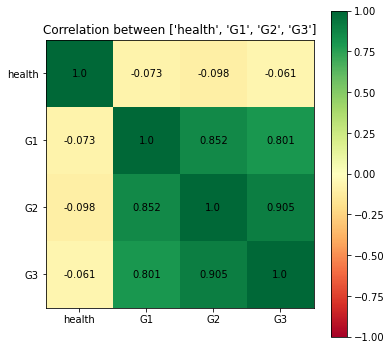

In [205]:
test_single_axes_plot(
    plot_fun=plot_correlation,
    data=STUDENTS_MATH_GRADES_DATASET
)

__Zadanie 5.__

Uzupełnij funkcję create_grid_subplots(...) w ten sposób, aby rysowała wykresy z Zadań 1-4 na siatce 2x2.

_Hint: Zbadaj implementację __test_single_axes_plot(...)__._ 

__Oczekiwane rozwiązanie:__

![solution](./data/ex_5_result.png)

In [208]:
def create_grid_subplots(data: pd.DataFrame) -> None:
    plotting_funs = [
        plot_numeric_column_means, plot_famsize_based_bars,
        plot_correlation, plot_mjob_histogram
    ]
    figure, axs = plt.subplots(2,2, figsize=(12,12))
    axs = [ax for ax_row in axs for ax in ax_row]
    for plotting_fun, ax in zip(plotting_funs, axs):
        plotting_fun(figure, ax, data)
    plt.tight_layout()
    plt.show()
        

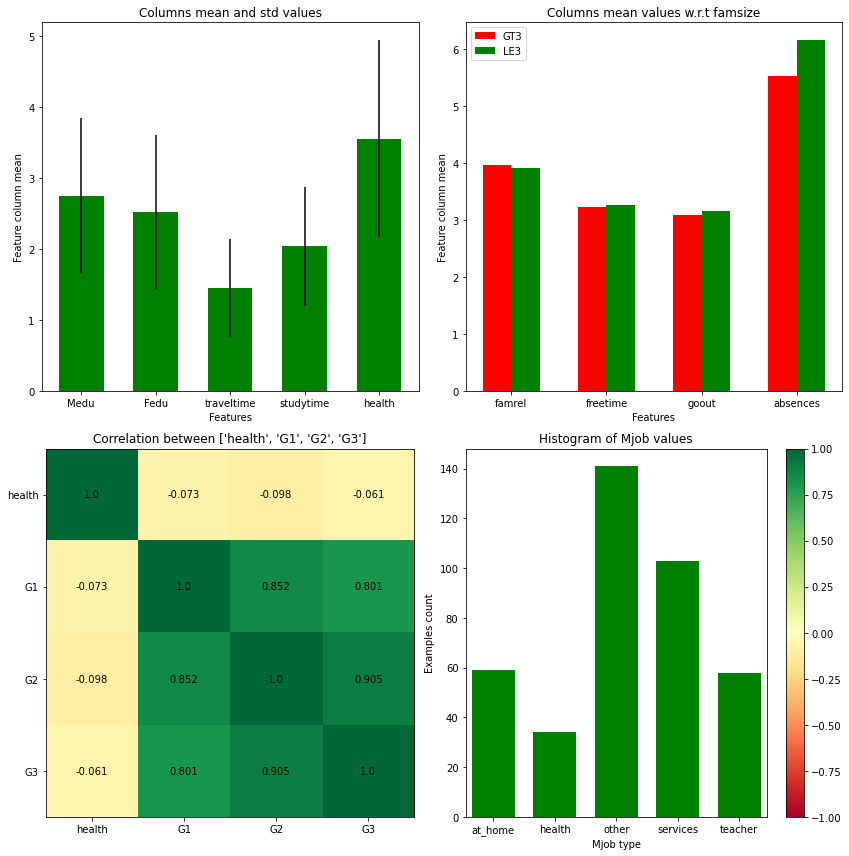

In [209]:
create_grid_subplots(data=STUDENTS_MATH_GRADES_DATASET)